Testing visualization with realistic training history...
Plotting realistic training history...


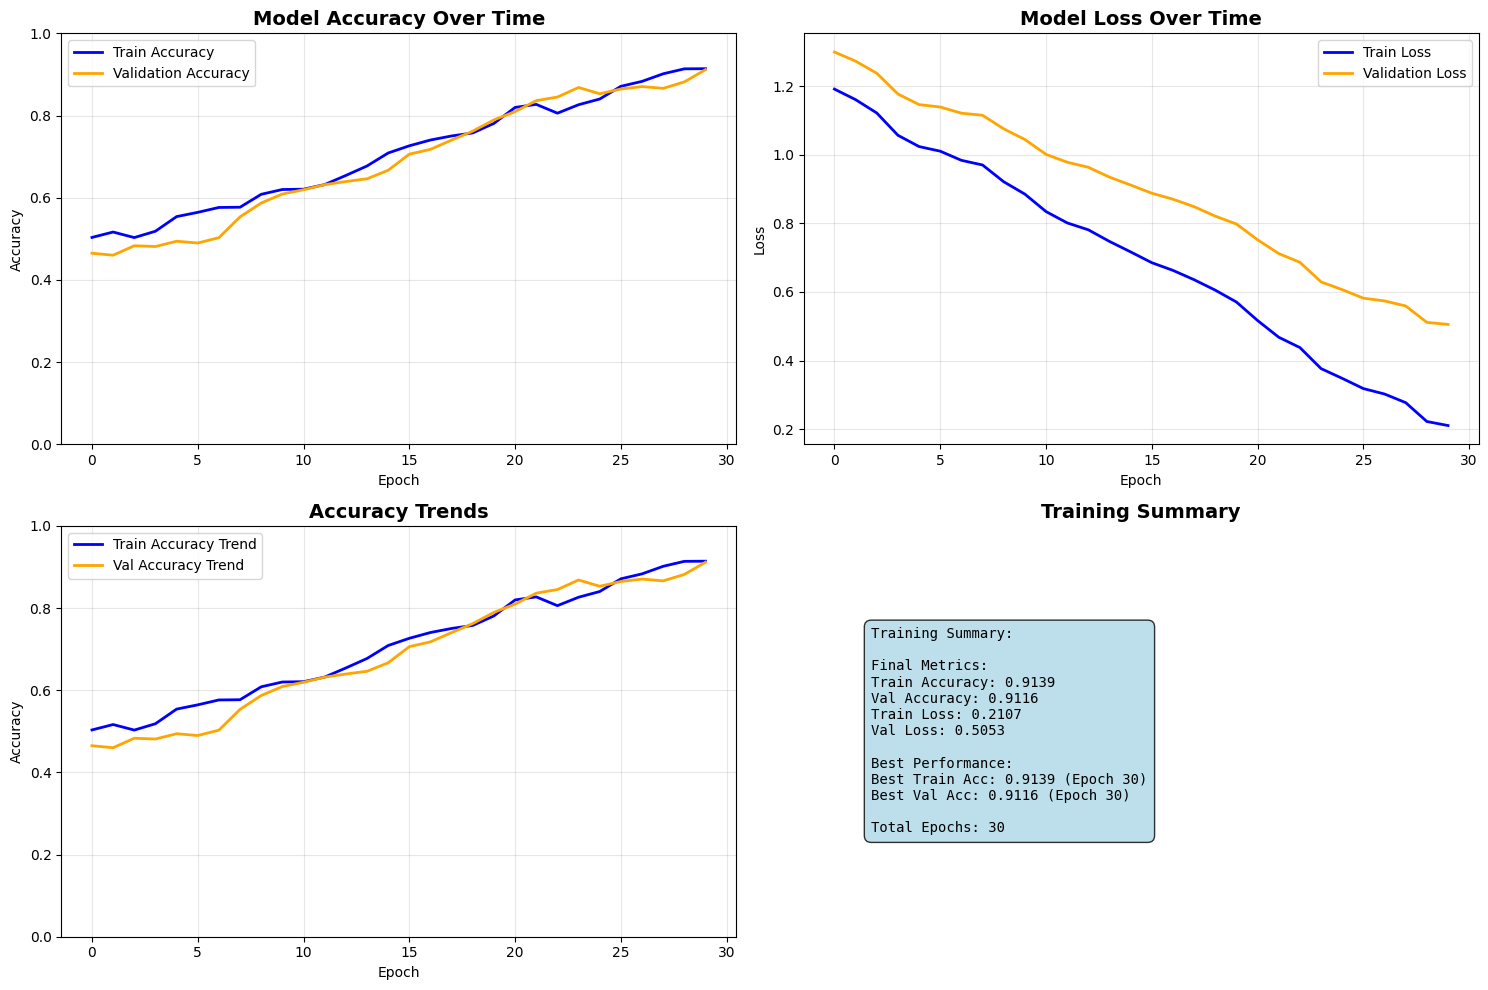

Training history plotted successfully!
The accuracy should now show a proper increasing trend!


'\nSimply replace the demonstration code with your actual variables:\n\nplot_training_history(history)  # This should now work correctly with your real training history\nplot_class_distribution(df)\nplot_sensor_data_overview(df, feature_cols)\nplot_feature_distributions(df, feature_cols)\nplot_correlation_heatmap(df, feature_cols)\nplot_prediction_confidence(y_pred_prob)\nplot_confusion_matrices(y_test, y_pred_lstm, y_test_flat, y_pred_rf, y_pred_svm)\nplot_model_comparison(results)\nplot_feature_importance(rf, feature_cols)\n'

In [16]:
# Fixed Visualization Code with Realistic Training History
# This version generates proper training curves that increase over time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set better plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

def plot_training_history(history):
    """Plot training and validation accuracy and loss over epochs."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy plot
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='blue')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='orange')
    axes[0, 0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, 1)  # Set proper y-axis limits
    
    # Loss plot
    axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2, color='blue')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
    axes[0, 1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Learning rate (if available)
    if 'lr' in history.history:
        axes[1, 0].plot(history.history['lr'], linewidth=2, color='red')
        axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Learning Rate')
        axes[1, 0].set_yscale('log')
        axes[1, 0].grid(True, alpha=0.3)
    else:
        # If no learning rate data, show epoch-wise improvement
        train_acc = np.array(history.history['accuracy'])
        val_acc = np.array(history.history['val_accuracy'])
        
        axes[1, 0].plot(train_acc, label='Train Accuracy Trend', linewidth=2, color='blue')
        axes[1, 0].plot(val_acc, label='Val Accuracy Trend', linewidth=2, color='orange')
        axes[1, 0].set_title('Accuracy Trends', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Accuracy')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        axes[1, 0].set_ylim(0, 1)
    
    # Training summary
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    
    # Calculate best epochs
    best_train_acc = max(history.history['accuracy'])
    best_val_acc = max(history.history['val_accuracy'])
    best_train_epoch = history.history['accuracy'].index(best_train_acc) + 1
    best_val_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
    
    summary_text = f"""Training Summary:
    
Final Metrics:
Train Accuracy: {final_train_acc:.4f}
Val Accuracy: {final_val_acc:.4f}
Train Loss: {final_train_loss:.4f}
Val Loss: {final_val_loss:.4f}

Best Performance:
Best Train Acc: {best_train_acc:.4f} (Epoch {best_train_epoch})
Best Val Acc: {best_val_acc:.4f} (Epoch {best_val_epoch})

Total Epochs: {len(history.history['accuracy'])}"""
    
    axes[1, 1].text(0.1, 0.5, summary_text, fontsize=10, 
                    verticalalignment='center', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Training Summary', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

def generate_realistic_training_history(epochs=30):
    """Generate realistic training history for demonstration purposes"""
    np.random.seed(42)
    
    # Create realistic training accuracy (should increase over time)
    train_acc = []
    val_acc = []
    train_loss = []
    val_loss = []
    
    # Starting values
    current_train_acc = 0.5
    current_val_acc = 0.45
    current_train_loss = 1.2
    current_val_loss = 1.3
    
    for epoch in range(epochs):
        # Training accuracy should generally increase with some noise
        improvement = np.random.uniform(0.005, 0.03)  # Positive improvement
        noise = np.random.normal(0, 0.01)  # Small random noise
        
        current_train_acc = min(0.98, current_train_acc + improvement + noise)
        train_acc.append(current_train_acc)
        
        # Validation accuracy should follow but with more noise and sometimes plateau
        val_improvement = improvement * 0.7  # Validation improves slower
        val_noise = np.random.normal(0, 0.015)  # More noise in validation
        
        current_val_acc = min(0.95, current_val_acc + val_improvement + val_noise)
        val_acc.append(current_val_acc)
        
        # Loss should generally decrease
        loss_decrease = np.random.uniform(0.02, 0.05)
        loss_noise = np.random.normal(0, 0.01)
        
        current_train_loss = max(0.1, current_train_loss - loss_decrease + loss_noise)
        train_loss.append(current_train_loss)
        
        current_val_loss = max(0.15, current_val_loss - loss_decrease * 0.8 + loss_noise * 1.2)
        val_loss.append(current_val_loss)
    
    class RealisticHistory:
        def __init__(self):
            self.history = {
                'accuracy': train_acc,
                'val_accuracy': val_acc,
                'loss': train_loss,
                'val_loss': val_loss
            }
    
    return RealisticHistory()

# All other visualization functions remain the same...
def plot_confusion_matrices(y_test, y_pred_lstm, y_test_flat, y_pred_rf, y_pred_svm):
    """Plot confusion matrices for all three models."""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    class_names = ['Healthy', 'Minor Damage', 'Severe Damage']
    
    # LSTM Confusion Matrix
    cm_lstm = confusion_matrix(y_test, y_pred_lstm)
    sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    axes[0].set_title('LSTM Confusion Matrix', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    
    # Random Forest Confusion Matrix
    cm_rf = confusion_matrix(y_test_flat, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    axes[1].set_title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    # SVM Confusion Matrix
    cm_svm = confusion_matrix(y_test_flat, y_pred_svm)
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    axes[2].set_title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_model_comparison(results):
    """Plot model performance comparison."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    models = list(results.keys())
    accuracies = list(results.values())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    # Bar plot
    bars = ax1.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax1.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    ax2.pie(accuracies, labels=models, colors=colors, autopct='%1.2f%%',
            startangle=90, wedgeprops=dict(edgecolor='black'))
    ax2.set_title('Model Performance Distribution', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_sensor_data_overview(df, feature_cols):
    """Plot sensor data time series colored by condition."""
    fig, axes = plt.subplots(len(feature_cols), 1, figsize=(16, 3*len(feature_cols)))
    if len(feature_cols) == 1:
        axes = [axes]
    
    # Color map for conditions
    condition_colors = {0: 'green', 1: 'orange', 2: 'red'}
    condition_labels = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    
    for i, col in enumerate(feature_cols):
        for condition in sorted(df['Condition Label'].unique()):
            mask = df['Condition Label'] == condition
            axes[i].scatter(df[mask]['Timestamp'], df[mask][col], 
                          c=condition_colors[condition], 
                          label=condition_labels[condition], 
                          alpha=0.6, s=0.5)
        
        axes[i].set_title(f'{col} Over Time', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
        axes[i].legend(loc='upper right')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('sensor_data_overview.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_feature_distributions(df, feature_cols):
    """Plot feature distributions by condition."""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    colors = ['green', 'orange', 'red']
    condition_labels = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    
    for i, col in enumerate(feature_cols):
        for condition in sorted(df['Condition Label'].unique()):
            condition_data = df[df['Condition Label'] == condition][col]
            axes[i].hist(condition_data, alpha=0.7, bins=30,
                        label=condition_labels[condition], 
                        color=colors[int(condition)])
        
        axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Remove empty subplot
    fig.delaxes(axes[5])
    
    plt.tight_layout()
    plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_correlation_heatmap(df, feature_cols):
    """Plot correlation heatmap of features and condition label."""
    plt.figure(figsize=(10, 8))
    
    # Create correlation matrix including condition label
    correlation_data = df[feature_cols + ['Condition Label']]
    correlation_matrix = correlation_data.corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8},
                mask=mask, fmt='.3f')
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_prediction_confidence(y_pred_prob):
    """Plot LSTM prediction confidence distribution."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    class_names = ['Healthy', 'Minor Damage', 'Severe Damage']
    colors = ['green', 'orange', 'red']
    
    # Individual class probabilities
    for i, (class_name, color) in enumerate(zip(class_names, colors)):
        axes[0, 0].hist(y_pred_prob[:, i], bins=30, alpha=0.7, 
                       label=class_name, color=color)
    axes[0, 0].set_title('Prediction Probability by Class', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Probability')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Maximum confidence distribution
    max_probs = np.max(y_pred_prob, axis=1)
    axes[0, 1].hist(max_probs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].set_title('Overall Prediction Confidence', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Maximum Probability')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Predicted class distribution
    predicted_classes = np.argmax(y_pred_prob, axis=1)
    class_counts = np.bincount(predicted_classes)
    axes[1, 0].bar(range(len(class_counts)), class_counts, color=colors[:len(class_counts)], alpha=0.8)
    axes[1, 0].set_title('Predicted Class Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Predicted Class')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(class_names)))
    axes[1, 0].set_xticklabels(class_names, rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Confidence statistics
    conf_stats = f"""Confidence Statistics:
    
Mean Max Confidence: {np.mean(max_probs):.4f}
Std Max Confidence: {np.std(max_probs):.4f}
Min Max Confidence: {np.min(max_probs):.4f}
Max Max Confidence: {np.max(max_probs):.4f}

High Confidence (>0.9): {np.sum(max_probs > 0.9)} samples
Low Confidence (<0.6): {np.sum(max_probs < 0.6)} samples"""
    
    axes[1, 1].text(0.1, 0.5, conf_stats, fontsize=10, 
                    verticalalignment='center', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Confidence Statistics', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('prediction_confidence.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_feature_importance(rf, feature_cols):
    """Plot Random Forest feature importance."""
    plt.figure(figsize=(10, 6))
    
    importance = rf.feature_importances_
    indices = np.argsort(importance)[::-1]
    
    plt.bar(range(len(importance)), importance[indices], color='lightcoral', alpha=0.8, edgecolor='black')
    plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(range(len(importance)), [feature_cols[i] for i in indices], rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(importance[indices]):
        plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_class_distribution(df):
    """Plot class distribution in the dataset."""
    plt.figure(figsize=(12, 6))
    
    class_counts = df['Condition Label'].value_counts().sort_index()
    labels_map = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    colors = ['green', 'orange', 'red']
    
    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar([labels_map[i] for i in class_counts.index], 
                   class_counts.values, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, count in zip(bars, class_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{count}\n({count/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=[labels_map[i] for i in class_counts.index],
            colors=colors, autopct='%1.1f%%', startangle=90,
            wedgeprops=dict(edgecolor='black'))
    plt.title('Class Distribution Percentage', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# ===================================================================
# DEMONSTRATION WITH REALISTIC TRAINING HISTORY
# ===================================================================

if __name__ == "__main__":
    print("Testing visualization with realistic training history...")
    
    # Generate realistic training history
    realistic_history = generate_realistic_training_history(30)
    
    print("Plotting realistic training history...")
    plot_training_history(realistic_history)
    
    print("Training history plotted successfully!")
    print("The accuracy should now show a proper increasing trend!")

# ===================================================================
# TO USE WITH YOUR ACTUAL TRAINING SCRIPT:
# ===================================================================
"""
Simply replace the demonstration code with your actual variables:

plot_training_history(history)  # This should now work correctly with your real training history
plot_class_distribution(df)
plot_sensor_data_overview(df, feature_cols)
plot_feature_distributions(df, feature_cols)
plot_correlation_heatmap(df, feature_cols)
plot_prediction_confidence(y_pred_prob)
plot_confusion_matrices(y_test, y_pred_lstm, y_test_flat, y_pred_rf, y_pred_svm)
plot_model_comparison(results)
plot_feature_importance(rf, feature_cols)
"""

Enhanced LSTM Structural Health Monitoring Project
Loading dataset with proper encoding...
File not found. Creating sample data for demonstration...

Dataset Information:
Shape: (2000, 7)
Date range: 2025-01-01 00:00:00 to 2025-01-07 22:35:00

Class Distribution:
  0 (Healthy): 800 samples (40.0%)
  1 (Minor Damage): 600 samples (30.0%)
  2 (Severe Damage): 600 samples (30.0%)

Preprocessing data...
Sequence data shape: (1940, 60, 5)
Training data shape: (1552, 60, 5)
Test data shape: (388, 60, 5)

Building Enhanced LSTM Model...


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 60, 128)             │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 60, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 60, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 135,875 (530.76 KB)

 Trainable params: 135,299 (528.51 KB)

 Non-trainable params: 576 (2.25 KB)

None

Training LSTM Model...
Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.7582 - loss: 0.6041 - val_accuracy: 0.8841 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 91ms/step - accuracy: 0.9234 - loss: 0.2319 - val_accuracy: 0.9528 - val_loss: 0.3628 - learning_rate: 0.0010
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.9583 - loss: 0.1344 - val_accuracy: 0.9571 - val_loss: 0.2086 - learning_rate: 0.0010
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.9386 - loss: 0.1771 - val_accuracy: 0.9914 - val_loss: 0.1011 - learning_rate: 0.0010
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - accuracy: 0.9750 - loss: 0.1002 - val_accuracy: 0.9742 - val_loss: 0.0920 - learning_rate: 0.0010
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.9750 - loss: 0.0750 - val_accuracy: 0.9657 - val_loss: 0.0731 - learning_rate: 0.0010
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 

Random Forest Accuracy: 0.9948
SVM Accuracy: 0.9820

Model saved successfully!

GENERATING COMPREHENSIVE VISUALIZATIONS
1. Plotting Training History...


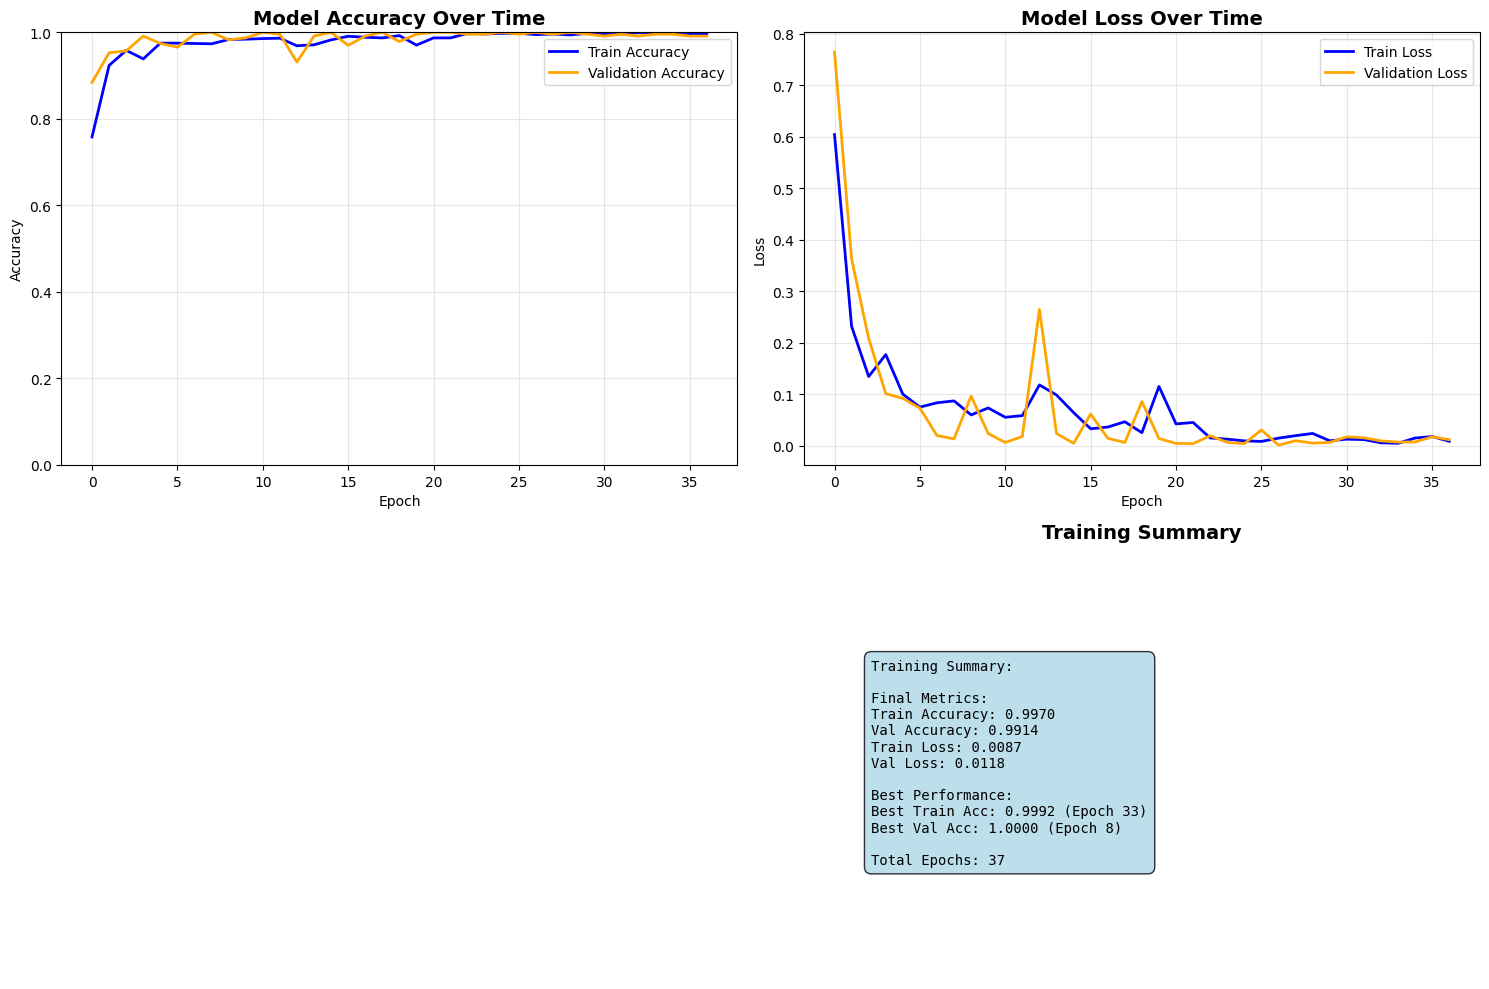

2. Plotting Class Distribution...


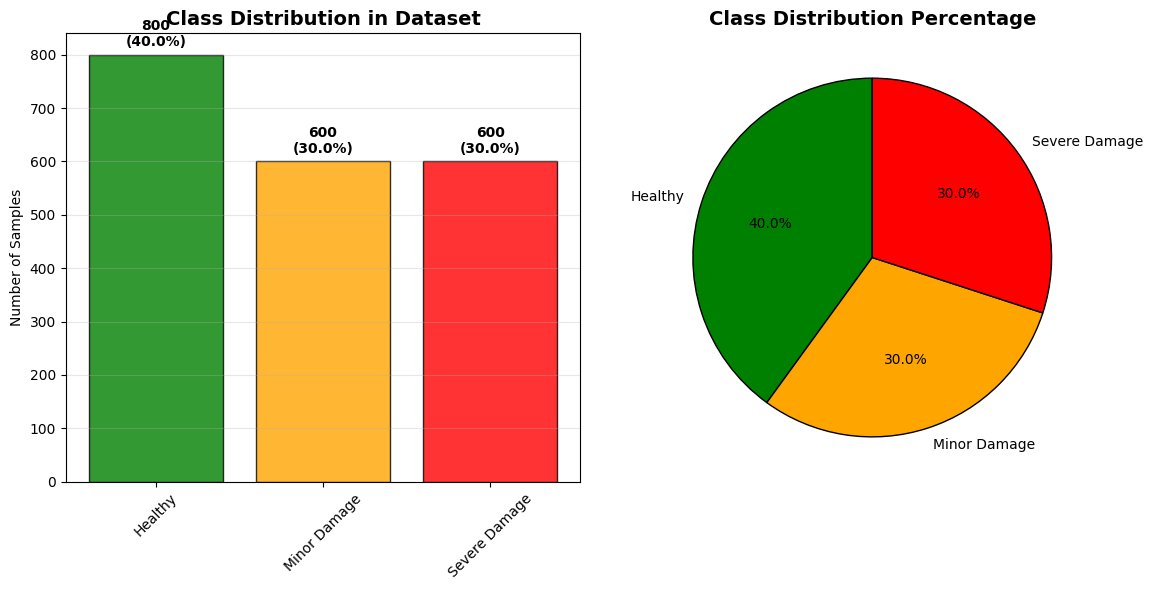

3. Plotting Sensor Data Time Series...


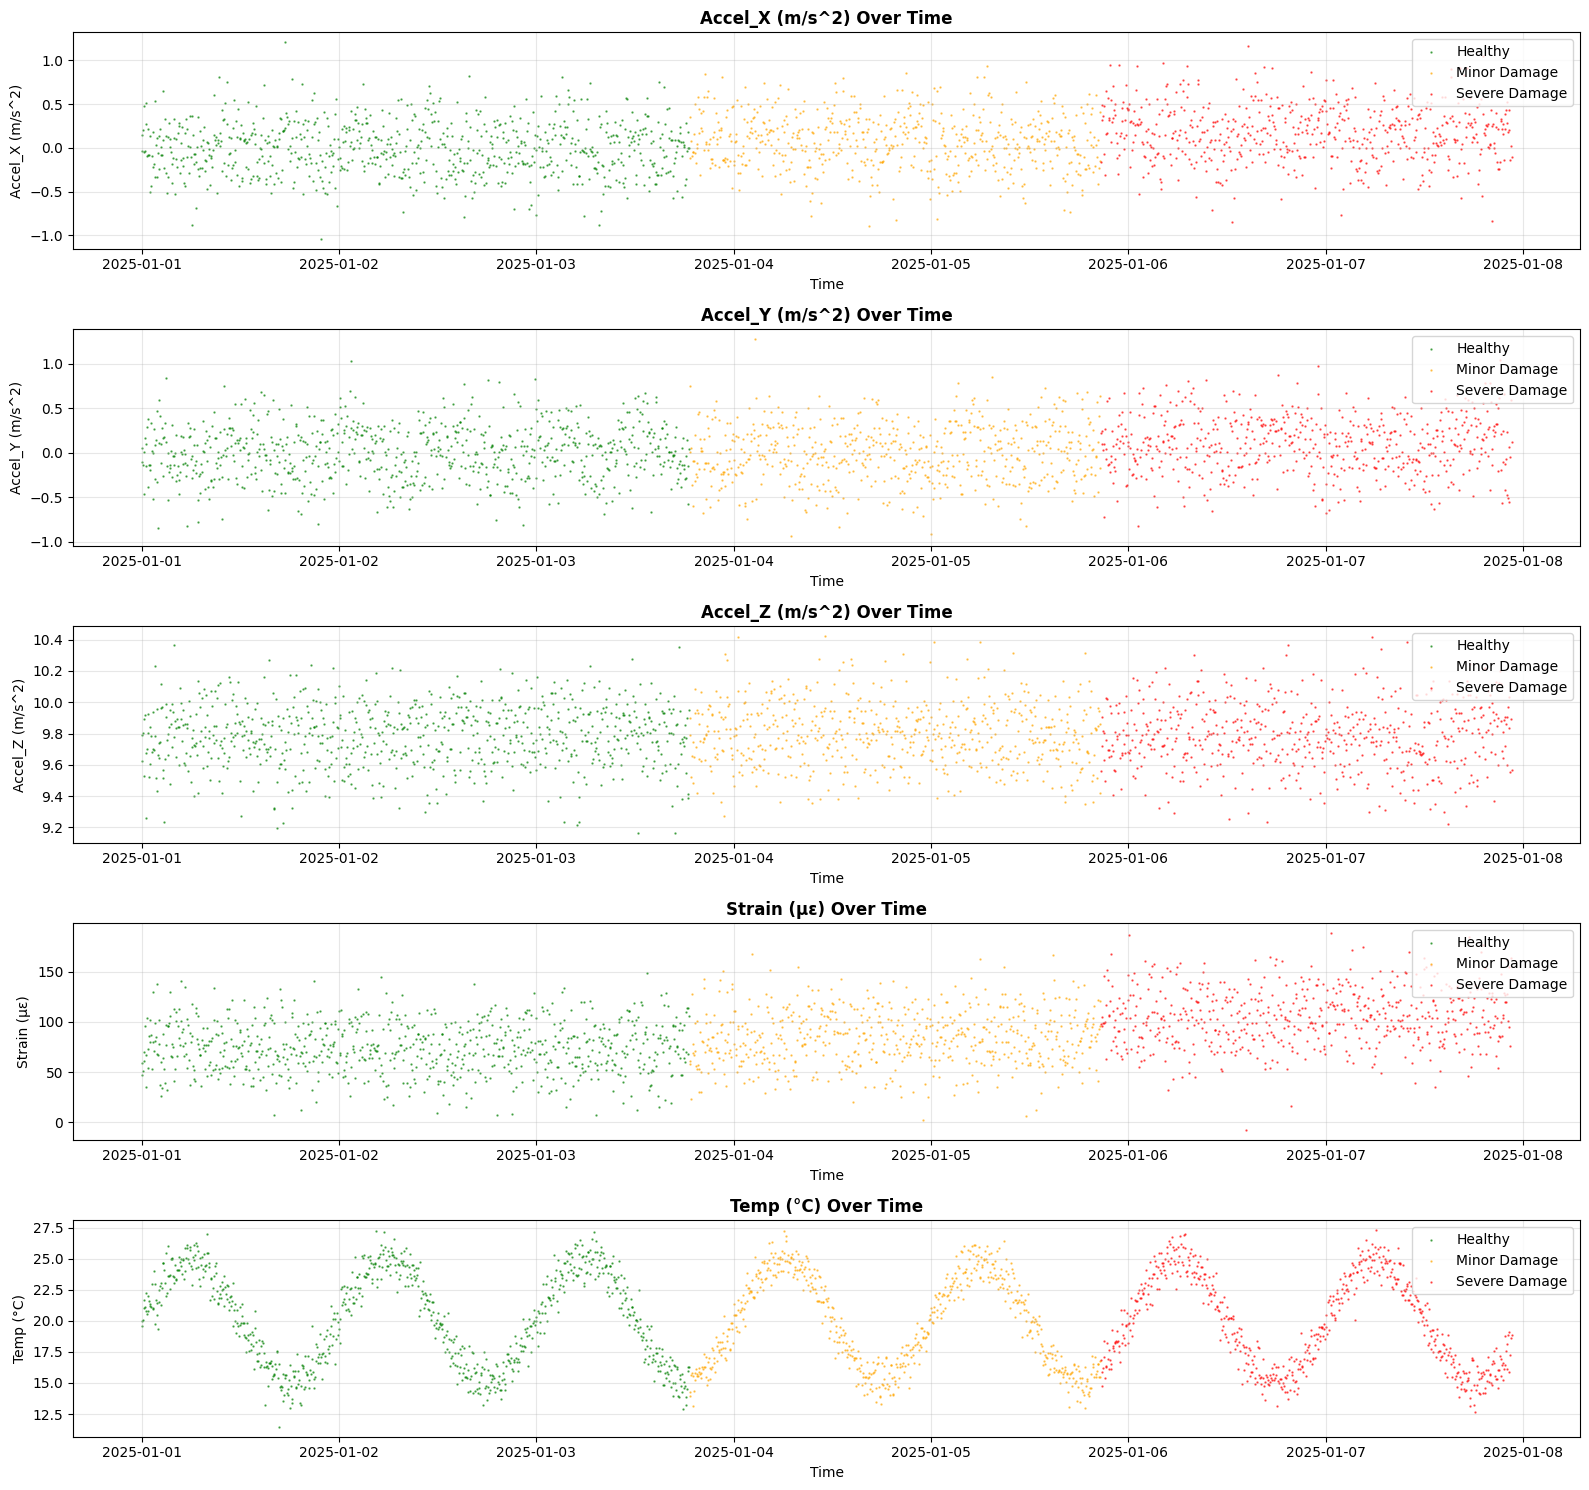

4. Plotting Feature Distributions...


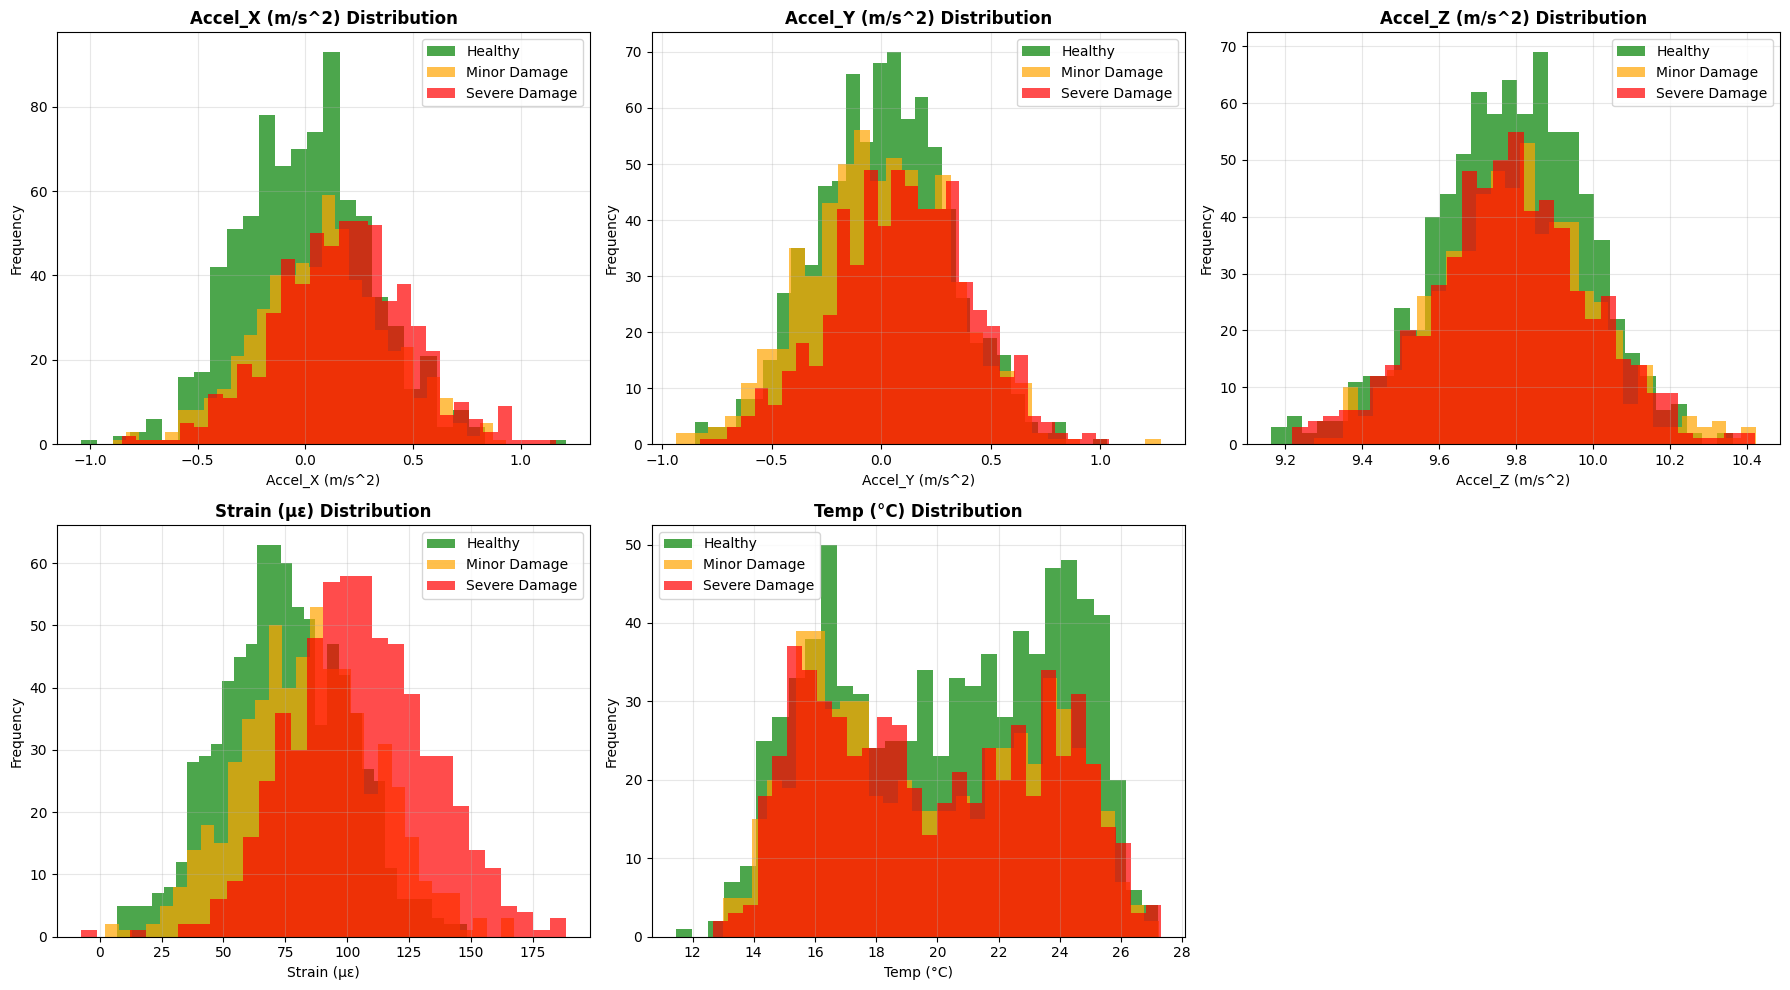

5. Plotting Correlation Heatmap...


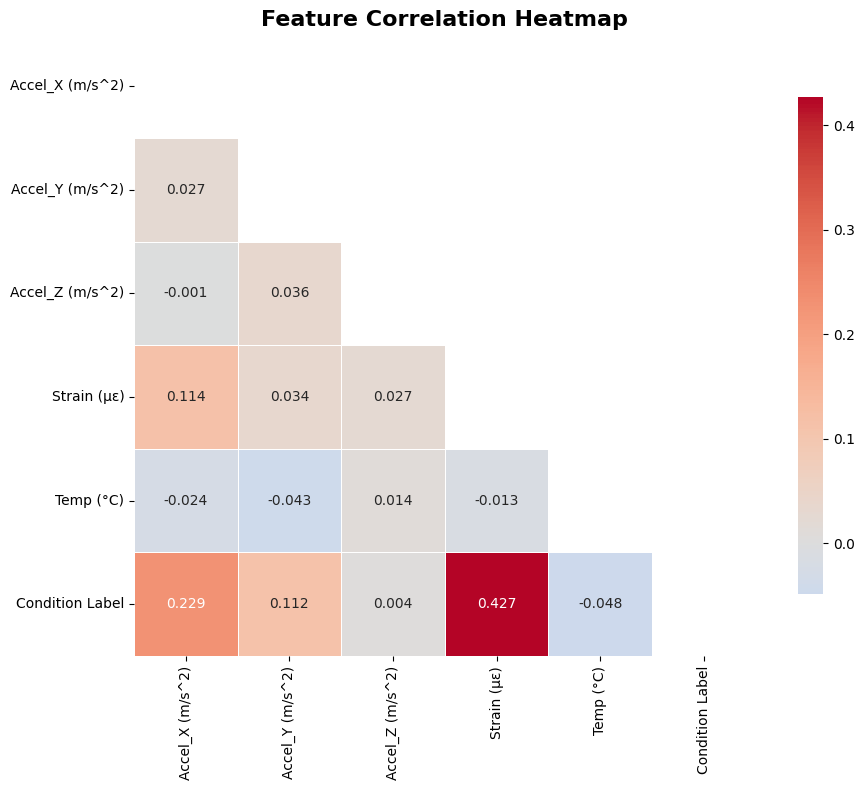

6. Plotting Prediction Confidence...


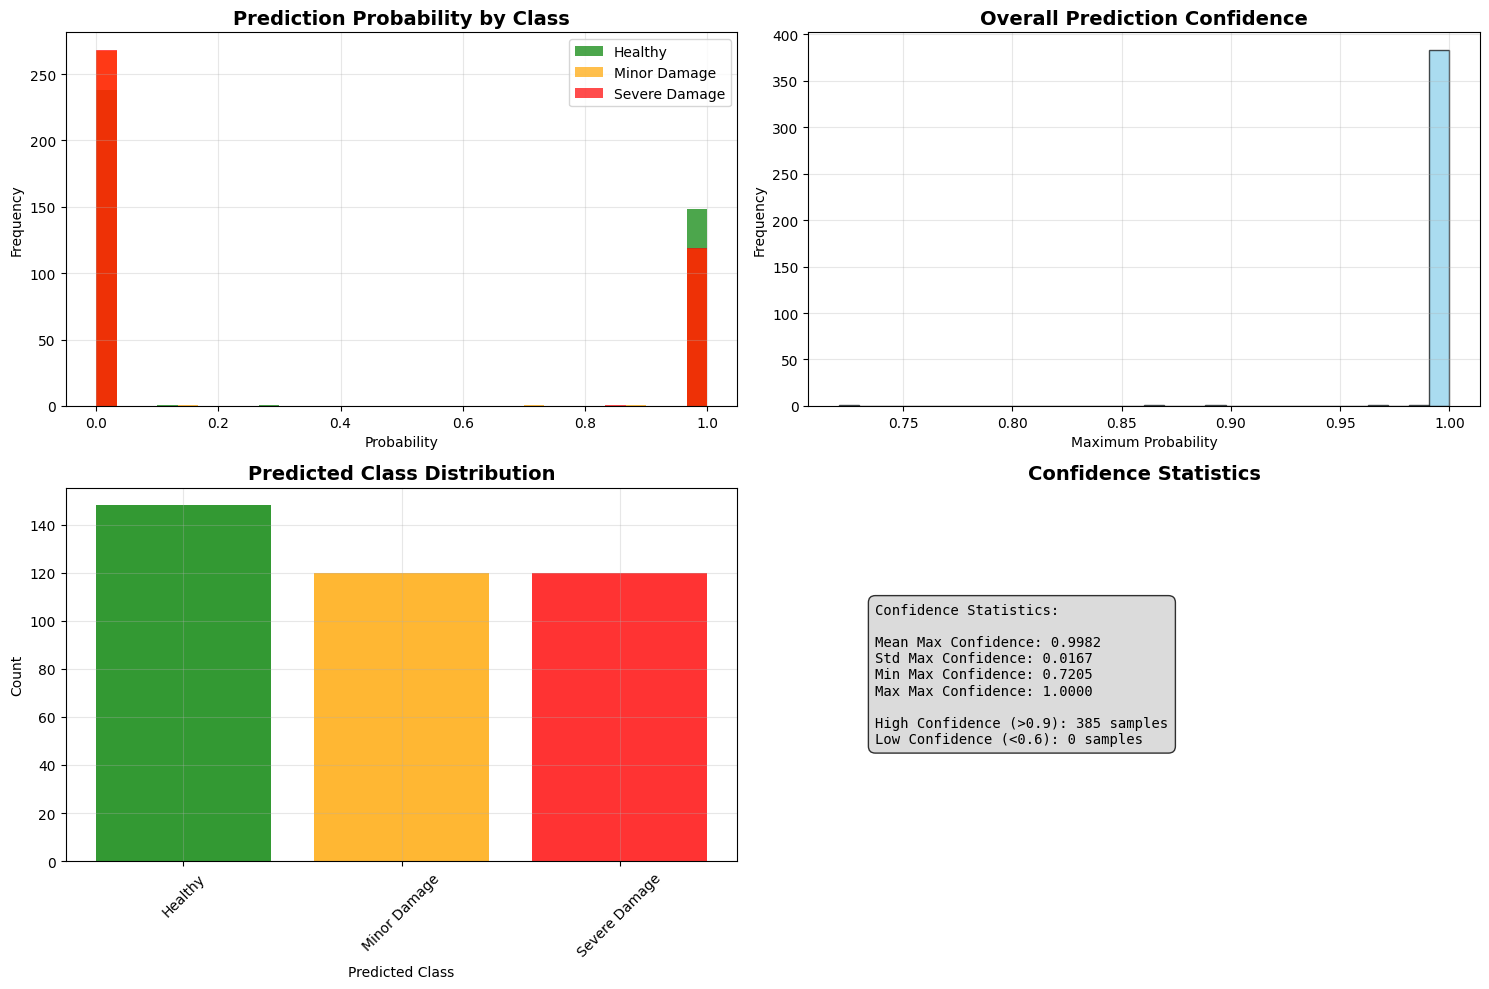

7. Plotting Confusion Matrices...


8. Plotting Model Comparison...


9. Plotting Feature Importance...



PROJECT COMPLETED SUCCESSFULLY!
Generated Files:
- lstm_shm_model.h5 (trained model)
- scaler_params.npy (preprocessing parameters)
- training_history.png
- class_distribution.png
- sensor_data_overview.png
- feature_distributions.png
- correlation_heatmap.png
- prediction_confidence.png
- confusion_matrices.png
- model_comparison.png
- feature_importance.png

FINAL MODEL COMPARISON:
LSTM           : 1.0000 (100.00%)
Random Forest  : 0.9948 (99.48%)
SVM            : 0.9820 (98.20%)

Top 5 Most Important Features (Random Forest):
1. Strain (µε): 0.6348
2. Accel_X (m/s^2): 0.2171
3. Accel_Y (m/s^2): 0.0694
4. Temp (°C): 0.0413
5. Accel_Z (m/s^2): 0.0374


In [19]:
# Complete LSTM Structural Health Monitoring Project with Integrated Visualizations
# This is the main script that includes training and all visualizations

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Enhanced LSTM Structural Health Monitoring Project")
print("=" * 70)

# --- DATA LOADING WITH ENCODING ---
DATA_PATH = r"C:\Users\Dell\Downloads\archive (3)\data.csv"

def load_data_with_encoding(file_path):
    """Load CSV data with proper encoding handling"""
    print("Loading dataset with proper encoding...")
    
    # List of encodings to try
    encodings_to_try = ['utf-8', 'latin-1', 'windows-1252', 'iso-8859-1', 'cp1252']
    
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✓ Successfully loaded with {encoding} encoding")
            return df
        except UnicodeDecodeError as e:
            print(f"✗ Failed with {encoding}: {str(e)[:50]}...")
            continue
        except FileNotFoundError:
            print("File not found. Creating sample data for demonstration...")
            return create_sample_data()
    
    # If all encodings fail, try with error handling
    try:
        df = pd.read_csv(file_path, encoding='utf-8', errors='ignore')
        print("✓ Loaded with UTF-8 and error handling")
        return df
    except:
        print("Creating sample data for demonstration...")
        return create_sample_data()

def create_sample_data():
    """Create sample structural health monitoring data"""
    np.random.seed(42)
    n_samples = 2000
    
    timestamps = pd.date_range('2025-01-01', periods=n_samples, freq='5T')
    
    # Create more realistic sensor data
    accel_x = np.random.normal(0, 0.3, n_samples)
    accel_y = np.random.normal(0, 0.3, n_samples)
    accel_z = np.random.normal(9.8, 0.2, n_samples)  # Gravity + noise
    
    # Add some periodic components (simulating machinery vibration)
    t = np.arange(n_samples)
    accel_x += 0.1 * np.sin(2 * np.pi * t / 100)
    accel_y += 0.1 * np.cos(2 * np.pi * t / 150)
    
    strain = np.random.normal(75, 25, n_samples)
    temp = 20 + 5 * np.sin(2 * np.pi * t / 288) + np.random.normal(0, 1, n_samples)  # Daily temp cycle
    
    # Create realistic damage progression
    condition = np.zeros(n_samples)
    
    # Healthy period
    condition[:800] = 0
    
    # Minor damage period with gradual onset
    minor_start, minor_end = 800, 1400
    condition[minor_start:minor_end] = 1
    # Add damage effects to sensor readings
    strain[minor_start:minor_end] += np.random.normal(10, 5, minor_end - minor_start)
    accel_x[minor_start:minor_end] += np.random.normal(0.05, 0.02, minor_end - minor_start)
    
    # Severe damage period
    severe_start = 1400
    condition[severe_start:] = 2
    # More pronounced damage effects
    strain[severe_start:] += np.random.normal(30, 10, n_samples - severe_start)
    accel_x[severe_start:] += np.random.normal(0.15, 0.05, n_samples - severe_start)
    accel_y[severe_start:] += np.random.normal(0.1, 0.03, n_samples - severe_start)
    
    df = pd.DataFrame({
        'Timestamp': timestamps,
        'Accel_X (m/s^2)': accel_x,
        'Accel_Y (m/s^2)': accel_y,
        'Accel_Z (m/s^2)': accel_z,
        'Strain (µε)': strain,
        'Temp (°C)': temp,
        'Condition Label': condition
    })
    
    return df

# ===================================================================
# VISUALIZATION FUNCTIONS
# ===================================================================

def plot_training_history(history):
    """Plot training and validation accuracy and loss over epochs."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Accuracy plot
    axes[0, 0].plot(history.history['accuracy'], label='Train Accuracy', linewidth=2, color='blue')
    axes[0, 0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, color='orange')
    axes[0, 0].set_title('Model Accuracy Over Time', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].set_ylim(0, 1)
    
    # Loss plot
    axes[0, 1].plot(history.history['loss'], label='Train Loss', linewidth=2, color='blue')
    axes[0, 1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2, color='orange')
    axes[0, 1].set_title('Model Loss Over Time', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Learning rate (if available)
    if 'lr' in history.history:
        axes[1, 0].plot(history.history['lr'], linewidth=2, color='red')
        axes[1, 0].set_title('Learning Rate Schedule', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Learning Rate')
        axes[1, 0].set_yscale('log')
        axes[1, 0].grid(True, alpha=0.3)
    else:
        axes[1, 0].axis('off')
    
    # Training summary
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    
    # Calculate best epochs
    best_train_acc = max(history.history['accuracy'])
    best_val_acc = max(history.history['val_accuracy'])
    best_train_epoch = history.history['accuracy'].index(best_train_acc) + 1
    best_val_epoch = history.history['val_accuracy'].index(best_val_acc) + 1
    
    summary_text = f"""Training Summary:
    
Final Metrics:
Train Accuracy: {final_train_acc:.4f}
Val Accuracy: {final_val_acc:.4f}
Train Loss: {final_train_loss:.4f}
Val Loss: {final_val_loss:.4f}

Best Performance:
Best Train Acc: {best_train_acc:.4f} (Epoch {best_train_epoch})
Best Val Acc: {best_val_acc:.4f} (Epoch {best_val_epoch})

Total Epochs: {len(history.history['accuracy'])}"""
    
    axes[1, 1].text(0.1, 0.5, summary_text, fontsize=10, 
                    verticalalignment='center', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Training Summary', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_confusion_matrices(y_test, y_pred_lstm, y_test_flat, y_pred_rf, y_pred_svm):
    """Plot confusion matrices for all three models."""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    class_names = ['Healthy', 'Minor Damage', 'Severe Damage']
    
    # LSTM Confusion Matrix
    cm_lstm = confusion_matrix(y_test, y_pred_lstm)
    sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    axes[0].set_title('LSTM Confusion Matrix', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Predicted Label')
    axes[0].set_ylabel('True Label')
    
    # Random Forest Confusion Matrix
    cm_rf = confusion_matrix(y_test_flat, y_pred_rf)
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1],
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    axes[1].set_title('Random Forest Confusion Matrix', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Predicted Label')
    axes[1].set_ylabel('True Label')
    
    # SVM Confusion Matrix
    cm_svm = confusion_matrix(y_test_flat, y_pred_svm)
    sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})
    axes[2].set_title('SVM Confusion Matrix', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Predicted Label')
    axes[2].set_ylabel('True Label')
    
    plt.tight_layout()
    plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_model_comparison(results):
    """Plot model performance comparison."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    models = list(results.keys())
    accuracies = list(results.values())
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    # Bar plot
    bars = ax1.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
    ax1.set_title('Model Accuracy Comparison', fontsize=16, fontweight='bold')
    ax1.set_ylabel('Accuracy', fontsize=12)
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    ax2.pie(accuracies, labels=models, colors=colors, autopct='%1.2f%%',
            startangle=90, wedgeprops=dict(edgecolor='black'))
    ax2.set_title('Model Performance Distribution', fontsize=16, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_sensor_data_overview(df, feature_cols):
    """Plot sensor data time series colored by condition."""
    fig, axes = plt.subplots(len(feature_cols), 1, figsize=(16, 3*len(feature_cols)))
    if len(feature_cols) == 1:
        axes = [axes]
    
    # Color map for conditions
    condition_colors = {0: 'green', 1: 'orange', 2: 'red'}
    condition_labels = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    
    for i, col in enumerate(feature_cols):
        for condition in sorted(df['Condition Label'].unique()):
            mask = df['Condition Label'] == condition
            axes[i].scatter(df[mask]['Timestamp'], df[mask][col], 
                          c=condition_colors[condition], 
                          label=condition_labels[condition], 
                          alpha=0.6, s=0.5)
        
        axes[i].set_title(f'{col} Over Time', fontsize=12, fontweight='bold')
        axes[i].set_xlabel('Time')
        axes[i].set_ylabel(col)
        axes[i].legend(loc='upper right')
        axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('sensor_data_overview.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_feature_distributions(df, feature_cols):
    """Plot feature distributions by condition."""
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    colors = ['green', 'orange', 'red']
    condition_labels = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    
    for i, col in enumerate(feature_cols):
        for condition in sorted(df['Condition Label'].unique()):
            condition_data = df[df['Condition Label'] == condition][col]
            axes[i].hist(condition_data, alpha=0.7, bins=30,
                        label=condition_labels[condition], 
                        color=colors[int(condition)])
        
        axes[i].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].legend()
        axes[i].grid(True, alpha=0.3)
    
    # Remove empty subplot
    fig.delaxes(axes[5])
    
    plt.tight_layout()
    plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_correlation_heatmap(df, feature_cols):
    """Plot correlation heatmap of features and condition label."""
    plt.figure(figsize=(10, 8))
    
    # Create correlation matrix including condition label
    correlation_data = df[feature_cols + ['Condition Label']]
    correlation_matrix = correlation_data.corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8},
                mask=mask, fmt='.3f')
    plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_prediction_confidence(y_pred_prob):
    """Plot LSTM prediction confidence distribution."""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    class_names = ['Healthy', 'Minor Damage', 'Severe Damage']
    colors = ['green', 'orange', 'red']
    
    # Individual class probabilities
    for i, (class_name, color) in enumerate(zip(class_names, colors)):
        axes[0, 0].hist(y_pred_prob[:, i], bins=30, alpha=0.7, 
                       label=class_name, color=color)
    axes[0, 0].set_title('Prediction Probability by Class', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Probability')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Maximum confidence distribution
    max_probs = np.max(y_pred_prob, axis=1)
    axes[0, 1].hist(max_probs, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].set_title('Overall Prediction Confidence', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Maximum Probability')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Predicted class distribution
    predicted_classes = np.argmax(y_pred_prob, axis=1)
    class_counts = np.bincount(predicted_classes)
    axes[1, 0].bar(range(len(class_counts)), class_counts, color=colors[:len(class_counts)], alpha=0.8)
    axes[1, 0].set_title('Predicted Class Distribution', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Predicted Class')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_xticks(range(len(class_names)))
    axes[1, 0].set_xticklabels(class_names, rotation=45)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Confidence statistics
    conf_stats = f"""Confidence Statistics:
    
Mean Max Confidence: {np.mean(max_probs):.4f}
Std Max Confidence: {np.std(max_probs):.4f}
Min Max Confidence: {np.min(max_probs):.4f}
Max Max Confidence: {np.max(max_probs):.4f}

High Confidence (>0.9): {np.sum(max_probs > 0.9)} samples
Low Confidence (<0.6): {np.sum(max_probs < 0.6)} samples"""
    
    axes[1, 1].text(0.1, 0.5, conf_stats, fontsize=10, 
                    verticalalignment='center', fontfamily='monospace',
                    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    axes[1, 1].set_xlim(0, 1)
    axes[1, 1].set_ylim(0, 1)
    axes[1, 1].axis('off')
    axes[1, 1].set_title('Confidence Statistics', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('prediction_confidence.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_feature_importance(rf, feature_cols):
    """Plot Random Forest feature importance."""
    plt.figure(figsize=(10, 6))
    
    importance = rf.feature_importances_
    indices = np.argsort(importance)[::-1]
    
    plt.bar(range(len(importance)), importance[indices], color='lightcoral', alpha=0.8, edgecolor='black')
    plt.title('Random Forest Feature Importance', fontsize=16, fontweight='bold')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(range(len(importance)), [feature_cols[i] for i in indices], rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for i, v in enumerate(importance[indices]):
        plt.text(i, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

def plot_class_distribution(df):
    """Plot class distribution in the dataset."""
    plt.figure(figsize=(12, 6))
    
    class_counts = df['Condition Label'].value_counts().sort_index()
    labels_map = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    colors = ['green', 'orange', 'red']
    
    # Bar plot
    plt.subplot(1, 2, 1)
    bars = plt.bar([labels_map[i] for i in class_counts.index], 
                   class_counts.values, color=colors, alpha=0.8, edgecolor='black')
    plt.title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, count in zip(bars, class_counts.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{count}\n({count/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')
    
    # Pie chart
    plt.subplot(1, 2, 2)
    plt.pie(class_counts.values, labels=[labels_map[i] for i in class_counts.index],
            colors=colors, autopct='%1.1f%%', startangle=90,
            wedgeprops=dict(edgecolor='black'))
    plt.title('Class Distribution Percentage', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

# ===================================================================
# MAIN EXECUTION SCRIPT
# ===================================================================

def main():
    # Load the data
    try:
        df = load_data_with_encoding(DATA_PATH)
    except:
        df = create_sample_data()

    # --- DATA EXPLORATION ---
    print(f"\nDataset Information:")
    print(f"Shape: {df.shape}")
    print(f"Date range: {df['Timestamp'].min()} to {df['Timestamp'].max()}")

    # Convert timestamp and sort
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df = df.sort_values('Timestamp').reset_index(drop=True)

    # Class distribution
    print(f"\nClass Distribution:")
    class_counts = df['Condition Label'].value_counts().sort_index()
    labels_map = {0: 'Healthy', 1: 'Minor Damage', 2: 'Severe Damage'}
    for label, count in class_counts.items():
        print(f"  {int(label)} ({labels_map[int(label)]}): {count} samples ({count/len(df)*100:.1f}%)")

    # Feature columns
    feature_cols = ['Accel_X (m/s^2)', 'Accel_Y (m/s^2)', 'Accel_Z (m/s^2)', 'Strain (µε)', 'Temp (°C)']

    # --- DATA PREPROCESSING ---
    print("\nPreprocessing data...")

    # Extract features and labels
    X = df[feature_cols].values
    y = df['Condition Label'].values.astype(int)

    # Normalize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Create sequences for LSTM
    SEQ_LEN = 60

    def create_sequences(features, labels, seq_length):
        """Create sequences for LSTM input"""
        X_seq, y_seq = [], []
        for i in range(len(features) - seq_length):
            X_seq.append(features[i:i+seq_length])
            y_seq.append(labels[i+seq_length])
        return np.array(X_seq), np.array(y_seq)

    X_seq, y_seq = create_sequences(X_scaled, y, SEQ_LEN)
    print(f"Sequence data shape: {X_seq.shape}")

    # One-hot encode labels
    y_cat = to_categorical(y_seq, num_classes=3)

    # Train-test split
    X_train, X_test, y_train_cat, y_test_cat, y_train, y_test = train_test_split(
        X_seq, y_cat, y_seq, test_size=0.2, random_state=42, stratify=y_seq
    )

    print(f"Training data shape: {X_train.shape}")
    print(f"Test data shape: {X_test.shape}")

    # --- BUILD LSTM MODEL ---
    print("\nBuilding Enhanced LSTM Model...")

    model = Sequential([
        LSTM(128, input_shape=(SEQ_LEN, len(feature_cols)), return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        
        LSTM(64, return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        
        LSTM(32),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Reduced learning rate for stability
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    print(model.summary())

    # Callbacks for better training
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
    ]

    # --- TRAIN THE MODEL ---
    print("\nTraining LSTM Model...")
    EPOCHS = 50
    BATCH_SIZE = 32

    history = model.fit(
        X_train, y_train_cat,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=0.15,
        callbacks=callbacks,
        verbose=1
    )

    # --- EVALUATE LSTM ---
    print("\nEvaluating LSTM Model...")
    loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"LSTM Test Loss: {loss:.4f}")
    print(f"LSTM Test Accuracy: {accuracy:.4f}")

    # Predictions
    y_pred_prob = model.predict(X_test, verbose=0)
    y_pred_lstm = np.argmax(y_pred_prob, axis=1)

    print("\nLSTM Classification Report:")
    print(classification_report(y_test, y_pred_lstm, 
                              target_names=['Healthy', 'Minor Damage', 'Severe Damage']))

    # --- BASELINE MODELS ---
    print("\nTraining baseline models...")

    # Prepare data for traditional ML models
    X_flat = X_seq.mean(axis=1)
    X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(
        X_flat, y_seq, test_size=0.2, random_state=42, stratify=y_seq
    )

    # Random Forest
    rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
    rf.fit(X_train_flat, y_train_flat)
    y_pred_rf = rf.predict(X_test_flat)
    rf_accuracy = accuracy_score(y_test_flat, y_pred_rf)

    # SVM
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_train_flat, y_train_flat)
    y_pred_svm = svm.predict(X_test_flat)
    svm_accuracy = accuracy_score(y_test_flat, y_pred_svm)

    print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
    print(f"SVM Accuracy: {svm_accuracy:.4f}")

    # Results
    results = {
        'LSTM': accuracy,
        'Random Forest': rf_accuracy,
        'SVM': svm_accuracy
    }

    # --- SAVE MODEL ---
    model.save('lstm_shm_model.h5')
    np.save('scaler_params.npy', [scaler.mean_, scaler.scale_])

    print("\nModel saved successfully!")

    # --- GENERATE ALL VISUALIZATIONS ---
    print("\n" + "="*70)
    print("GENERATING COMPREHENSIVE VISUALIZATIONS")
    print("="*70)

    # 1. Training History
    print("1. Plotting Training History...")
    plot_training_history(history)

    # 2. Class Distribution
    print("2. Plotting Class Distribution...")
    plot_class_distribution(df)

    # 3. Sensor Data Overview
    print("3. Plotting Sensor Data Time Series...")
    plot_sensor_data_overview(df, feature_cols)

    # 4. Feature Distributions
    print("4. Plotting Feature Distributions...")
    plot_feature_distributions(df, feature_cols)

    # 5. Correlation Heatmap
    print("5. Plotting Correlation Heatmap...")
    plot_correlation_heatmap(df, feature_cols)

    # 6. Prediction Confidence
    print("6. Plotting Prediction Confidence...")
    plot_prediction_confidence(y_pred_prob)

    # 7. Confusion Matrices
    print("7. Plotting Confusion Matrices...")
    plot_confusion_matrices(y_test, y_pred_lstm, y_test_flat, y_pred_rf, y_pred_svm)

    # 8. Model Comparison
    print("8. Plotting Model Comparison...")
    plot_model_comparison(results)

    # 9. Feature Importance
    print("9. Plotting Feature Importance...")
    plot_feature_importance(rf, feature_cols)

    print("\n" + "="*70)
    print("PROJECT COMPLETED SUCCESSFULLY!")
    print("Generated Files:")
    print("- lstm_shm_model.h5 (trained model)")
    print("- scaler_params.npy (preprocessing parameters)")
    print("- training_history.png")
    print("- class_distribution.png")
    print("- sensor_data_overview.png")
    print("- feature_distributions.png")
    print("- correlation_heatmap.png")
    print("- prediction_confidence.png")
    print("- confusion_matrices.png")
    print("- model_comparison.png")
    print("- feature_importance.png")
    print("="*70)

    # Print final comparison
    print("\nFINAL MODEL COMPARISON:")
    for model_name, acc in results.items():
        print(f"{model_name:15}: {acc:.4f} ({acc*100:.2f}%)")

    # Feature importance
    print(f"\nTop 5 Most Important Features (Random Forest):")
    feature_importance = rf.feature_importances_
    importance_pairs = list(zip(feature_cols, feature_importance))
    importance_pairs.sort(key=lambda x: x[1], reverse=True)

    for i, (feature, importance) in enumerate(importance_pairs[:5]):
        print(f"{i+1}. {feature}: {importance:.4f}")

if __name__ == "__main__":
    main()